# Written by jonathan kjellen


In [1]:
# The following file paths need to contain the correct files for this notebook to run:
file_path_debate_sentiment = "../../Data/data 2018-09-09 2022-09-11/Debates_sentiments.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import ast

In [3]:

df = pd.read_csv(file_path_debate_sentiment)

for i in range(len(df)):
    df.at[i,"answer"] = ast.literal_eval(df.iloc[i]["answer"])
df = df.drop_duplicates(subset='id_')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_                       1874 non-null   object 
 1   question                  1874 non-null   object 
 2   question_date             1874 non-null   object 
 3   answer                    1874 non-null   object 
 4   undertecknare_name        1874 non-null   object 
 5   undertecknare_partibet    1874 non-null   object 
 6   besvaradav_name           1874 non-null   object 
 7   besvaradav_partibet       1874 non-null   object 
 8   debattdag                 1530 non-null   object 
 9   ip_id                     1874 non-null   object 
 10  question_len              1874 non-null   int64  
 11  question_BERT_label       1874 non-null   object 
 12  question_BERT_label_prob  1874 non-null   float64
 13  question_BERT_probs       1874 non-null   object 
dtypes: float

# The sentiment of the questions

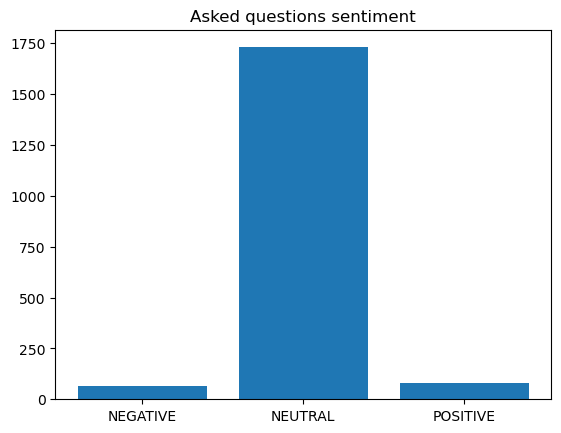

In [5]:
a = df["question_BERT_label"]
labels, counts = np.unique(a,return_counts=True)
ticks = range(len(counts))
plt.title("Asked questions sentiment")
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)
plt.show()

# The sentiment of all the answers

In [6]:
sentiment = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    for j in range(len(answers)):
        label = df.iloc[i]["answer"][j]["answer_BERT_label"]
        sentiment[label] +=1

In [7]:
sentiment

{'POSITIVE': 1161, 'NEUTRAL': 10388, 'NEGATIVE': 114}

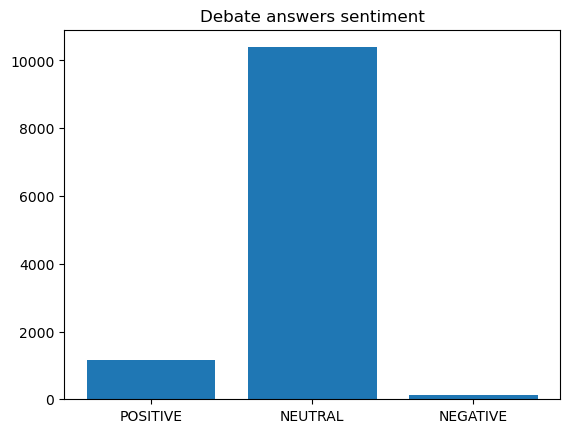

In [8]:
import numpy as np
list_items = [t[1] for t in list(sentiment.items())]
list_keys = list(sentiment.keys())
import matplotlib.pyplot as plt 
ticks = range(len(sentiment))
plt.title("Debate answers sentiment")
plt.bar(ticks,list_items, align='center')
plt.xticks(ticks, list_keys)
plt.show()

# Checking how many debate answers there are of the different sentiments based on the sentiment of the question:

In [9]:

negative_questions_answers = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
positive_questions_answers = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
neutral_questions_answers = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}

question_dict_num_labels = {
    "POSITIVE":positive_questions_answers,
    "NEGATIVE":negative_questions_answers,
    "NEUTRAL":neutral_questions_answers
}
for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    question_sentiment = question_dict_num_labels[df.iloc[i]["question_BERT_label"]]
    for j in range(len(answers)):
        label = df.iloc[i]["answer"][j]["answer_BERT_label"]
        question_sentiment[label] +=1

[174, 285, 2]


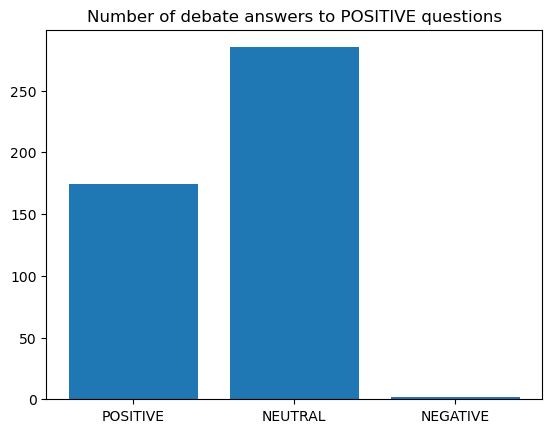

[22, 342, 14]


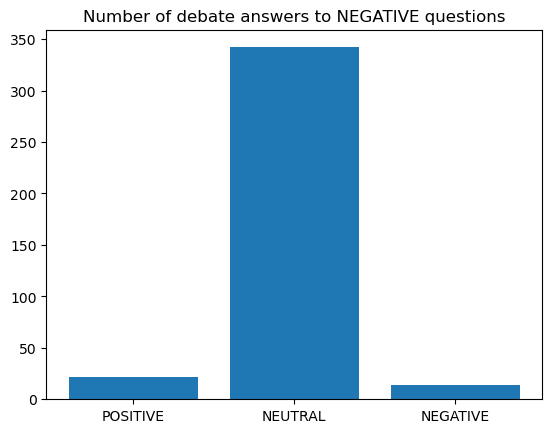

[965, 9761, 98]


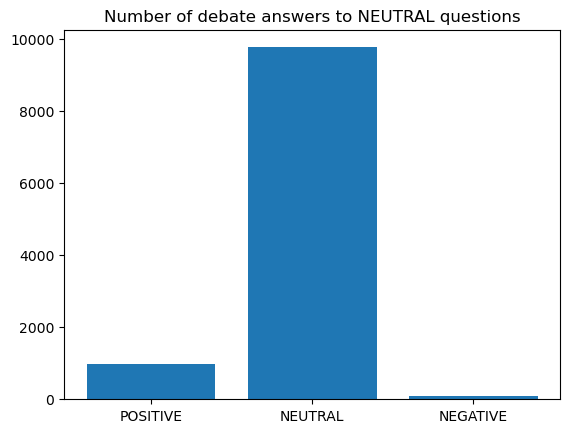

In [10]:
for key in question_dict_num_labels:
    list_items = [t[1] for t in list(question_dict_num_labels[key].items())]
    print(list_items)
    list_keys = list(question_dict_num_labels[key].keys())
    ticks = range(len(question_dict_num_labels[key]))
    plt.title("Number of debate answers to "+ key + " questions")
    plt.bar(ticks,list_items, align='center')
    plt.xticks(ticks, list_keys)
    plt.show()

# Checking the average certainty for every sentiment 

In [11]:
negative_questions_score = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
positive_questions_score = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
neutral_questions_score = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}

question_dict_score = {
    "POSITIVE":positive_questions_score,
    "NEGATIVE":negative_questions_score,
    "NEUTRAL":neutral_questions_score
}
for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    question_sentiment = question_dict_score[df.iloc[i]["question_BERT_label"]]
    for j in range(len(answers)):
        label = df.iloc[i]["answer"][j]["answer_BERT_label"]
        score = df.iloc[i]["answer"][j]["answer_BERT_label_prob"]
        question_sentiment[label] += score

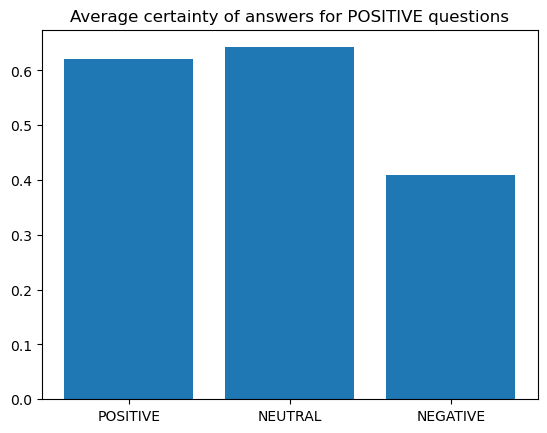

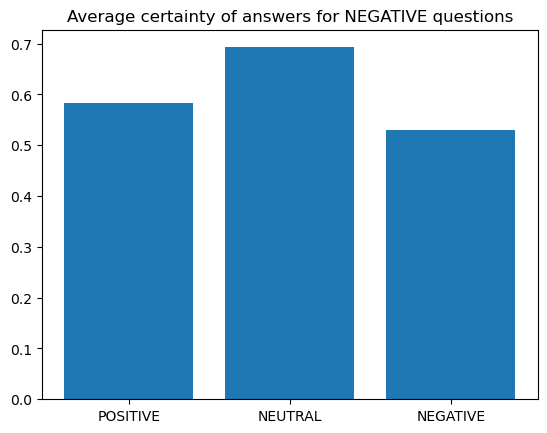

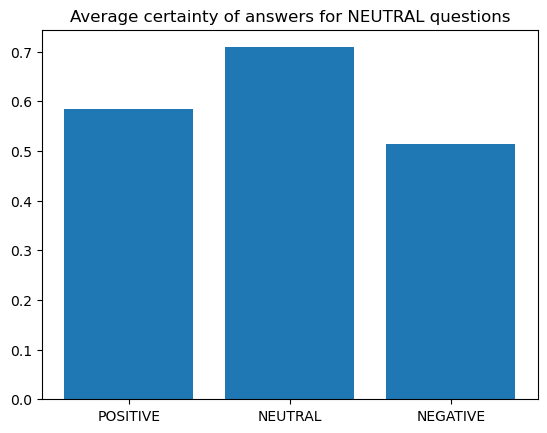

In [12]:
for key in question_dict_score:
    list_items = [t[1] for t in list(question_dict_score[key].items())]
    list_items_num_labels = [t[1] for t in list(question_dict_num_labels[key].items())]
    avg_score = [x / y for x, y in zip(list_items, list_items_num_labels)]
    list_keys = list(question_dict_score[key].keys())
    ticks = range(len(question_dict_score[key]))
    plt.title("Average certainty of answers for "+ key + " questions")
    plt.bar(ticks,avg_score, align='center')
    plt.xticks(ticks, list_keys)
    plt.show()

# 10 Random samples:

In [13]:
import random

random_numbers = random.sample(range(1, len(df)), 10)

print(random_numbers)

[1058, 1063, 1018, 1194, 49, 1792, 165, 438, 1559, 142]


In [14]:


for index in random_numbers:
    print(df.iloc[index])
    print(df.iloc[index]["answer"])

id_                                                                    h81083
question                    av Maria Nilsson (L)\ntill Utrikesminister Ann...
question_date                                                      2020-10-26
answer                      [{'answer': 'Anf.  29  Utrikesminister ANN LIN...
undertecknare_name                                              Maria Nilsson
undertecknare_partibet                                                      L
besvaradav_name                                     Utrikesminister Ann Linde
besvaradav_partibet                                                         S
debattdag                                                          2020-11-20
ip_id                                                              2020/21:83
question_len                                                              326
question_BERT_label                                                   NEUTRAL
question_BERT_label_prob                                        

# Checking the negative answers to negative questions:

In [15]:
count = 0
for i in range(len(df)):
    if df.iloc[i]["question_BERT_label"] == "NEGATIVE":
        for j in range(len(df.iloc[i]["answer"])):
            if df.iloc[i]["answer"][j]["answer_BERT_label"] == "NEGATIVE":
                print(df.iloc[i]["answer"][j])
                count +=1
print(count)

{'answer': 'Anf.\xa0\xa04\xa0\xa0THOMAS MORELL\xa0(SD):Fru talman! Tack för svaret, statsrådet!Det vi diskuterar nu är en världsbild som regeringen och Trafikverket beskriver. Men vi har också en världsbild där ute där de som nyttjar vårt vägsystem har en helt annan uppfattning.Det är människor som sitter och kör 8\xa0000–10\xa0000 mil om året och kanske har 20–30 års yrkeserfarenhet bakom sig. Många av dem sitter just i denna stund och tittar på den här debatten. Att säga att deras intryck av väghållningen inte stämmer är direkt att undervärdera deras kunskap.Trafikverket slår ifrån sig. Deras presschef vill inte ens kännas vid den kritik som finns där ute. Det har varit åtskilliga inlägg där både yrkesförare och andra har påtalat att det inte fungerar.Man hänger upp alltihop på den elektroniska meteorologen som står i diket. Den är oftast alldeles för sen. Det må vara att man är teknikintresserad. Men det hjälper föga när den som sedan tar till sig informationen vid en dataskärm inte

# Checking the average length of the answers:

In [16]:
negative_questions_length = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
positive_questions_length = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}
neutral_questions_length = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}

question_dict_len = {
    "POSITIVE":positive_questions_length,
    "NEGATIVE":negative_questions_length,
    "NEUTRAL":neutral_questions_length
}
for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    question_sentiment = question_dict_len[df.iloc[i]["question_BERT_label"]]
    for j in range(len(answers)):
        label = df.iloc[i]["answer"][j]["answer_BERT_label"]
        length = len(df.iloc[i]["answer"][j]["answer"])
        #score = df.iloc[i]["answer"][j]["answer_BERT_label_prob"]
        question_sentiment[label] += length

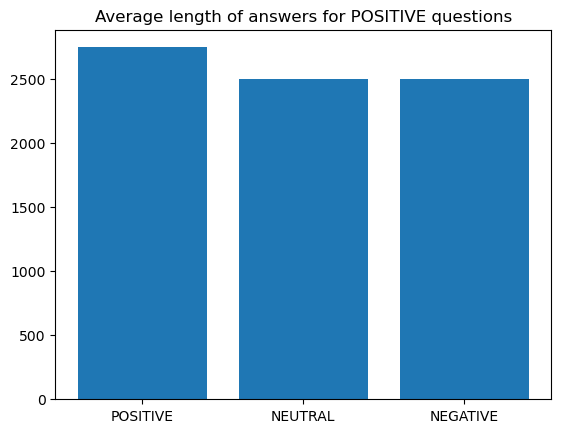

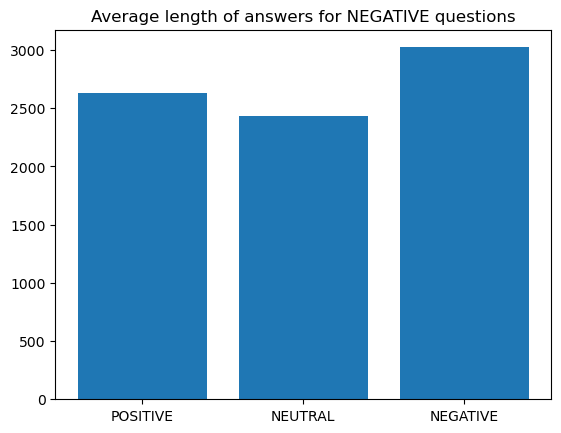

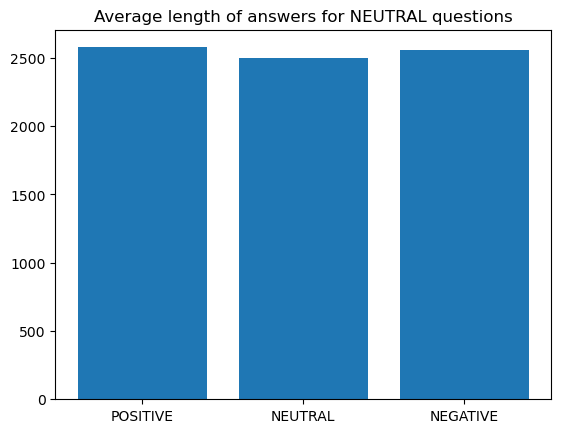

In [17]:
for key in question_dict_len:
    list_items = [t[1] for t in list(question_dict_len[key].items())]
    list_items_num_labels = [t[1] for t in list(question_dict_num_labels[key].items())]
    avg_score = [x / y for x, y in zip(list_items, list_items_num_labels)]
    list_keys = list(question_dict_len[key].keys())
    ticks = range(len(question_dict_len[key]))
    plt.title("Average length of answers for "+ key + " questions")
    plt.bar(ticks,avg_score, align='center')
    plt.xticks(ticks, list_keys)
    plt.show()

# Question sentiment for questions without answer

In [18]:
question_sentiment = {"POSITIVE":0,"NEUTRAL":0,"NEGATIVE":0}


for i in range(len(df)):
    answers = df.iloc[i]["answer"]
    if len(answers) == 0:
        label = df.iloc[i]["question_BERT_label"]
        question_sentiment[label] += 1

In [19]:
question_sentiment

{'POSITIVE': 18, 'NEUTRAL': 357, 'NEGATIVE': 18}

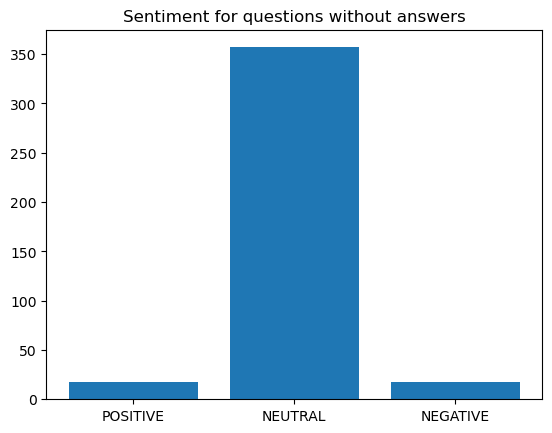

In [20]:
list_items = [t[1] for t in list(question_sentiment.items())]
list_keys = list(question_sentiment.keys())
ticks = range(len(question_sentiment))
plt.title("Sentiment for questions without answers")
plt.bar(ticks,list_items, align='center')
plt.xticks(ticks, list_keys)
plt.show()
